### Prediction of Microsoft stock prices using Machine Learning.

importing the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('dataset/MicrosoftStock.csv')
df

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.710,27.3100,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.920,27.5000,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.000,27.7500,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.110,27.8800,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.060,27.8700,28.04,32663174,MSFT
...,...,...,...,...,...,...,...,...
1254,391452,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT
1255,391453,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT
1256,391454,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT
1257,391455,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT


Let us check the data types of the data frame.

In [5]:
df.dtypes

index       int64
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

Let us check for null values in the data frame.

In [6]:
df.isnull().sum()

index     0
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

Let us analyze the statistical measures of this dataset.

In [7]:
df.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


#### Exploratory Data Analysis

Let us draw a few plots to detect trends.

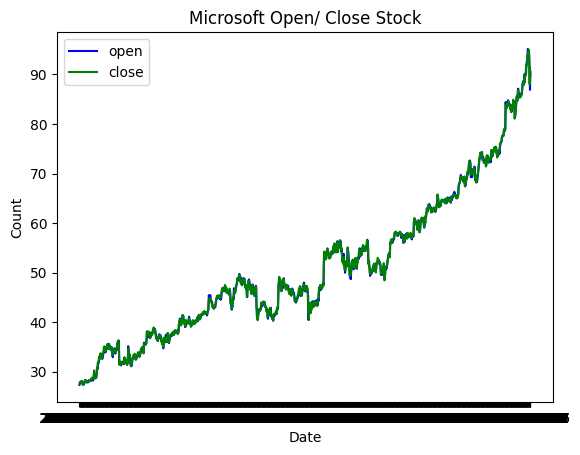

In [8]:
plt.plot(df['date'],df['open'], color='blue', label='open')
plt.plot(df['date'],df['close'], color='green', label='close')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title("Microsoft Open/ Close Stock")
plt.legend()

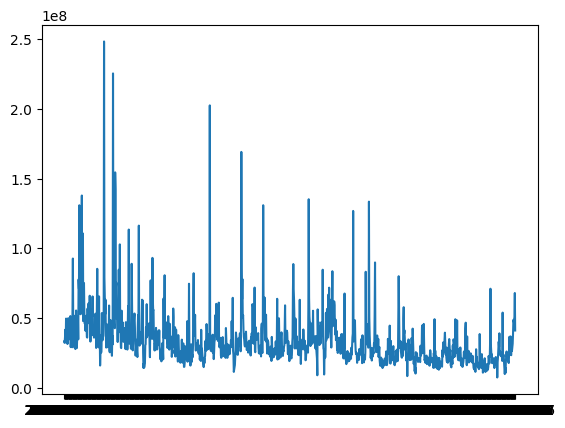

In [9]:
plt.plot(df['date'],df['volume'])
plt.show()

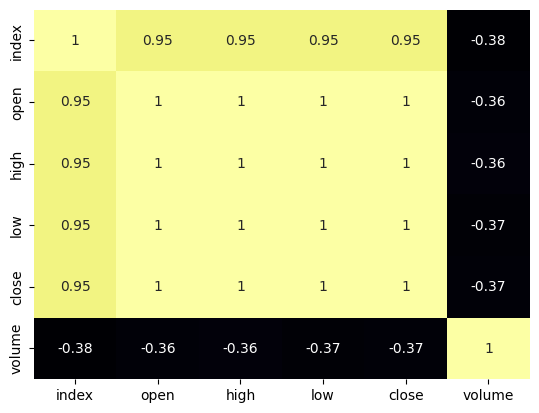

In [23]:
# let us select the numerical columns
columns_to_exclude = ['date','Name']
df_except_date = df.drop(columns=columns_to_exclude)

sns.heatmap(df_except_date.corr(), annot=True, cbar=False, cmap='inferno')
plt.show()

Text(0.5, 1.0, 'Microsoft Stock Prices')

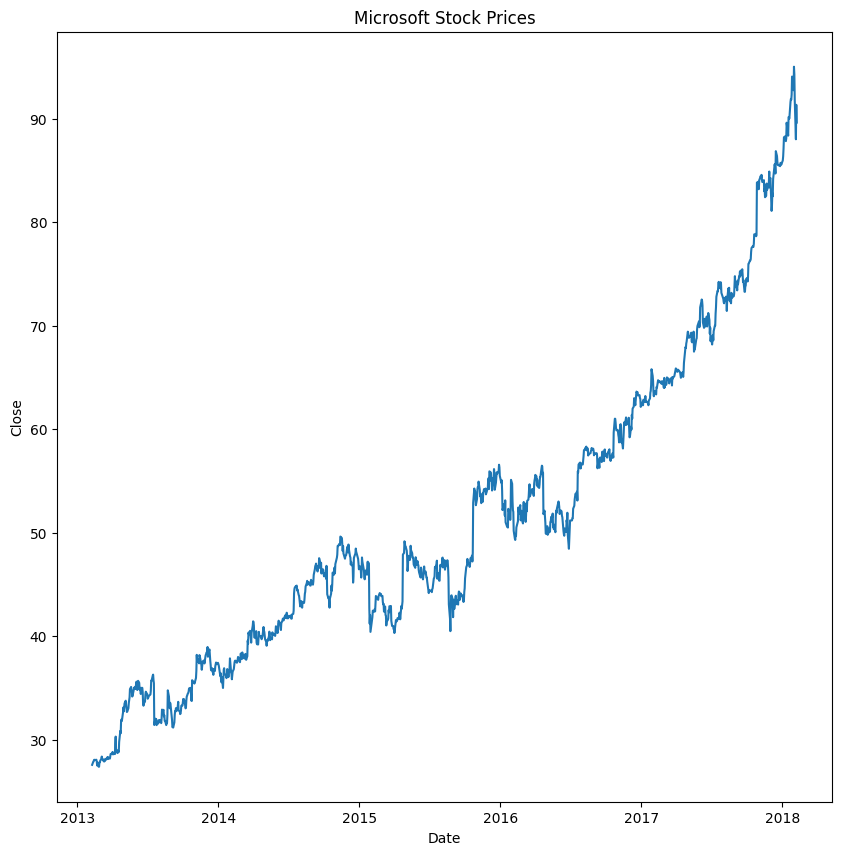

In [24]:
df['date'] = pd.to_datetime(df['date']) 
prediction = df.loc[(df['date'] 
                            > datetime(2013, 1, 1)) 
                            & (df['date'] 
                            < datetime(2018, 1, 1))] 
  
plt.figure(figsize=(10, 10)) 
plt.plot(df['date'], df['close']) 
plt.xlabel("Date") 
plt.ylabel("Close") 
plt.title("Microsoft Stock Prices") 

#### Preparation of Dataset for training model

In [26]:
msft_close = df.filter(['close']) 
dataset = msft_close.values 
training = int(np.ceil(len(dataset) * 0.95)) 
  
# scale the data 
ss = StandardScaler() 
ss = ss.fit_transform(dataset) 
  
train_data = ss[0:int(training), :] 
  
x_train = [] 
y_train = [] 
  
# considering 60 as the batch size, 
# create the X_train and y_train 
for i in range(60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0]) 
    y_train.append(train_data[i, 0]) 
  
x_train, y_train = np.array(x_train),np.array(y_train) 
X_train = np.reshape(x_train, 
                     (x_train.shape[0], 
                      x_train.shape[1], 1)) 
  

Let us build the LSTM model now.

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

lstm_model = Sequential() # creating a sequential model
lstm_model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))

#let us now add the layers
lstm_model.add(LSTM(units=64))
lstm_model.add(Dense(128))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1))

print(lstm_model.summary()) # let us print the structure summary of the model

c:\Users\arkha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


Let us now compile the model. The metric being analysed is the Root Mean Squared Error.

In [28]:
from keras.metrics import RootMeanSquaredError

lstm_model.compile(optimizer='adam', loss='mae', metrics=[RootMeanSquaredError()])

Let us now fit the model

In [29]:
history = lstm_model.fit(X_train, y_train, epochs=20)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3195 - root_mean_squared_error: 0.4314
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1074 - root_mean_squared_error: 0.1456
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1011 - root_mean_squared_error: 0.1424
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0962 - root_mean_squared_error: 0.1303
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0930 - root_mean_squared_error: 0.1230
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0893 - root_mean_squared_error: 0.1201
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0906 - root_mean_squared_error: 0.1235
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0850 - root_mean_squared_error: 0.1139
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0839 - root_mean_squared_error: 0.1142
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0871 - root_mean_squared_error: 0.1175

Let us test the model on the validation data.

In [30]:
testing = ss[training - 60:, :] 
x_test = [] 
y_test = dataset[training:, :] 
for i in range(60, len(testing)): 
    x_test.append(testing[i-60:i, 0]) 
  
x_test = np.array(x_test) 
X_test = np.reshape(x_test, 
                    (x_test.shape[0], 
                     x_test.shape[1], 1)) 
  
pred = lstm_model.predict(X_test) 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Let us make a plot to see how the model performed.

C:\Users\arkha\AppData\Local\Temp\ipykernel_28660\4202452003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


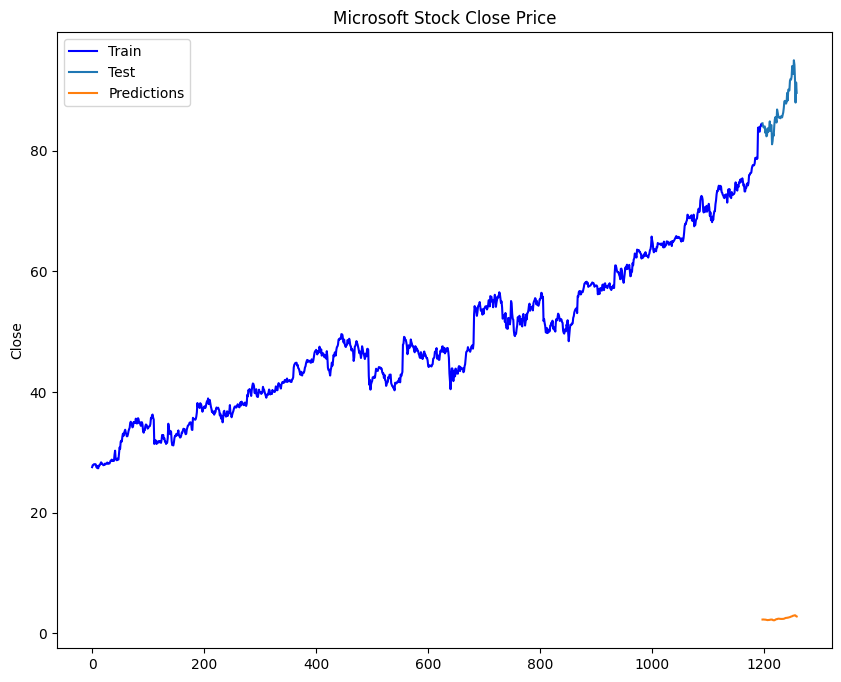

In [31]:
train = df[:training] 
test = df[training:] 
test['Predictions'] = pred 
  
plt.figure(figsize=(10, 8)) 
plt.plot(train['close'], c="b") 
plt.plot(test[['close', 'Predictions']]) 
plt.title('Microsoft Stock Close Price') 
plt.ylabel("Close") 
plt.legend(['Train', 'Test', 'Predictions'])

### Model Evaluation

Let us try to plot ROC AUC curves to evaluate the perfomances of different models.

Upon trial, we cannot plot ROC AUC curves for other models such as Random Forest Regressor and Gradient Booster as they can take only two parameters at max. However, our dataset makes use of more than two parameters.